In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
312855,312855,437364,437365,How do you find the calories count of food?,What's the best way to calorie count?,0
281318,281318,54117,30765,What is the secret of keeping a successful lon...,Do long distance relationships ever work out?,1
23754,23754,44464,44465,Why are vehicles made to take weapons of mass ...,Why is marble classified as an igneous rock?,0
22824,22824,42804,42805,Is it possible to stop the answers by a specif...,Is there any way I can prevent the posts of sp...,1
62208,62208,108472,108473,Which skills do you want to develop when asked...,Would a candidate of 7763 aipmt rank get cims ...,0
359766,359766,489450,489451,What is Euler’s number?,Can someone explain the number e (Euler's numb...,0
108246,108246,177908,177909,How do I convert this 35 mm film camera to a d...,Describe a digital camera. How is it different...,0
231607,231607,341459,341460,What we can learn in just 10 minutes that we w...,Life: What can I learn right now in 10 minutes...,1
65100,65100,113031,113032,What is the best way to request a letter for a...,How do I write a requisition letter for school...,1
28712,28712,53215,53216,How does I make a person lovable with other li...,I've experienced a lot with losing both my par...,0


In [5]:
df['question1'].iloc[281318]

'What is the secret of keeping a successful long distance relationship?'

In [6]:
df['question2'].iloc[281318]

'Do long distance relationships ever work out?'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


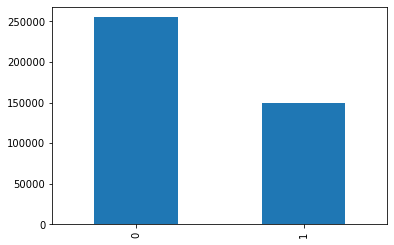

In [10]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


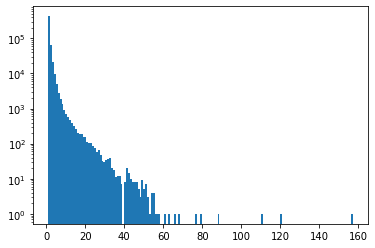

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()